# Pandas

### Задания

**Задание 1.**

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5.

In [ ]:
# задано изначально
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))

s = s.sort_values(ascending = True)
bigger_than_five = s[s > 5]
display(bigger_than_five.head(1))

67    5.148891
dtype: float64

**Задание 2.**

Имеется небольшой игрушечный DataFrame, в котором необходимо провести несколько типов фильтраций и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [ ]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])


# ваш код тут
df['важность клиента'] = df['доход'] * df['надежность клиента']
df['возможная долгосрочность клиента'] = df['важность клиента'] - (df['возраст'].mean() - df['возраст'])

display("Все кто старше 40: ", df[df["возраст"] > 40])
display("Все кто имеет доход выше среднего: ", df[df["доход"] > df["доход"].mean()])
display("Но надёжность ниже среднего: ", df[(df["доход"] > df["доход"].mean()) & (df["надежность клиента"] < df["надежность клиента"].mean())])



'Все кто старше 40: '

,имя,возраст,доход,надежность клиента,пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,65011.75
2,Аня,41,150000,0.87,жен,130500.0,130507.75


'Все кто имеет доход выше среднего: '

,имя,возраст,доход,надежность клиента,пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,65011.75
2,Аня,41,150000,0.87,жен,130500.0,130507.75


'Но надёжность ниже среднего: '

,имя,возраст,доход,надежность клиента,пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,65011.75


**Задание 3.**

Как объединить два DataFrame по двум столбцам так, чтобы остались только общие строки?

Объедините df1 и df2 по столбцам fruit-frukt и weight-ves.

In [ ]:
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['low', 'medium', 'high'] * 3,
                    'price': np.random.randint(0, 100, 9)})

df2 = pd.DataFrame({'frukt': ['apple', 'banana', 'melon'] * 2,
                    'ves': ['low', 'high'] * 3,
                    'price': np.random.randint(0, 100, 6)})

df = pd.merge(df1, df2, how='inner', left_on=['fruit', 'weight'], right_on=['frukt', 'ves'])

display(df)

,fruit,weight,price_x,frukt,ves,price_y
0,apple,low,17,apple,low,36
1,apple,low,74,apple,low,36
2,apple,low,82,apple,low,36


**Задание 4.** 
Сгенерировать и добавить номера телефонов следующего вида +7(000)000 00 00 в таблицу



In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": "Алексей", "Age": 20}]

df = pd.DataFrame(d)

phone_num1 = pd.DataFrame(np.random.randint(10000,99999, size = (5,1)), dtype=str)
phone_num2 = pd.DataFrame(np.random.randint(10000,99999, size = (5,1)), dtype=str)

phone_num = phone_num1 + phone_num2
phone_num = "+7" + phone_num

k = []
for index, row in phone_num.iterrows():
    c = row[0][0:2] + "(" + row[0][2:5] + ")" + row[0][5:8] + "-" + row[0][8:10]+ "-" + row[0][10:12]
    k.append(c)

phone_num[0] = k

df["Номер телефона"] = phone_num

print(df)

      Name  Age    Номер телефона
0   Виктор   18  +7(664)679-62-86
1    Мария   21  +7(250)128-84-14
2     Иван   19  +7(898)322-21-67
3     Иван   25  +7(514)482-86-96
4  Алексей   20  +7(362)898-71-28


***Задание 1***

Скачать файл по ссылке https://disk.yandex.ru/d/ZeDbB3rqhIr1NA , считать через pandas. Получить список уникальных значений - стран в колонке "Country", отфильтровать и получить данные только по выпускникам колледжа. Убрать строки с пропусками в данных (NaN). (В случае ошибок типов можете конвертировать колонки к нужным типам через .astype(str) или .astype(int). Подсчитать макс значение, среднее и СКО для числа детей (household_children) в отфильтрованных данных.

In [ ]:
df = pd.read_csv('H1N1_Flu_Vaccines.csv')
pd.set_option('display.max_columns', None)
display(df.head())

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [ ]:
print(df['hhs_geo_region'].unique())

['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']


In [ ]:
display(df[df['education'] == 'College Graduate'])

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,2.0,4.0,2.0,1.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,xicduogh,ccgxvspp,1,1
12,12,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,5.0,4.0,1.0,65+ Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",1.0,0.0,NaN,NaN,0,1
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,2.0,1.0,1.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,3.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26694,26694,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,College Graduate,White,Female,"> $75,000",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,wxleyezf,emcorrxb,0,1
26697,26697,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,65+ Years,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,kbazzjca,"MSA, Principle City",1.0,0.0,NaN,NaN,0,0
26698,26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,4.0,4.0,2.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,atmpeygn,"MSA, Not Principle City",1.0,1.0,dotnnunm,mxkfnird,0,1
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,2.0,4.0,4.0,2.0,4.0,18 - 34 Years,College Graduate,White,Female,"> $75,000",Not Married,Rent,Not in Labor Force,fpwskwrf,"MSA, Principle City",3.0,0.0,NaN,NaN,0,0


In [ ]:
print(df.isna().sum())

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [ ]:
df = df.dropna()

In [ ]:
print(df.isna().sum())

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [ ]:
max_number = df['household_children'].max()
mean_number = df['household_children'].mean()
sko_number = df['household_children'].std()

print(f"Максимальное значение: {max_number}")
print(f"Среднее значение: {mean_number}")
print(f"Среднеквадратическое отклонение: {sko_number}")

Максимальное значение: 3.0
Среднее значение: 0.6422246388068976
Среднеквадратическое отклонение: 0.9744277968414833


**Задание 2**

Скачать файл по ссылке https://disk.yandex.ru/i/uoN5eQE1qPCXCQ , считать через pandas второй лист (Olympics). Отфильтровать данные по России и золотым медалистам, построить график разброса возраст-вид_спорта. Построить линейный график на след данных - df.groupby('Year').Age.mean().dropna(). Сохранить графики в pdf. Отфильтровать изначальные данные только по летнему сезону, убрать колонку Город, создать колонку Год рождения, вычислить её через Возраст и Дату проведения, датафрейм сохранить вместе с графиками в архиве и скачать (командами, не через GUI).

In [ ]:
df = pd.read_excel('Olympics 2018.xlsx', sheet_name = 'Olympics')

list_columns = [] #Удаление столбцов Unnamed
for i in range(17, 33):
    list_columns.append('Unnamed: ' + str(i))

df = df.drop(list_columns, axis = 1)
df2 = df.copy()
display(df.head())

,Sort,Year,Sport,Gender,Event,Athlete,Age,Result,Medal,City,Country,Team,Season,Team Medals,OR,WR,Notes
0,1,1896,Athletics,M,100m,Tom Burke,21.0,12,GOLD,Athens,Greece,United States,Summer,1.0,=ORS/OR,NaN,NaN
1,2,1896,Athletics,M,100m,Fritz Hofmann,24.0,12.2,SILVER,Athens,Greece,Germany,Summer,1.0,NaN,NaN,NaN
2,3,1896,Athletics,M,100m,Francis Lane,21.0,12.6,BRONZE,Athens,Greece,United States,Summer,1.0,ORS,NaN,NaN
3,4,1896,Athletics,M,100m,Alajos Szokolyi,24.0,12.6,BRONZE,Athens,Greece,Hungary,Summer,1.0,NaN,NaN,NaN
4,5,1896,Athletics,M,400m,Tom Burke,21.0,54.2,GOLD,Athens,Greece,United States,Summer,1.0,OR,NaN,NaN


In [ ]:
df = df[(df['Country'] == 'Russia') & (df['Medal'] == 'GOLD')]
display(df.head())

,Sort,Year,Sport,Gender,Event,Athlete,Age,Result,Medal,City,Country,Team,Season,Team Medals,OR,WR,Notes
37315,37315,2014,Alpine Skiing,M,Combined,Sandro Viletta,28.0,00:02:45.200000,GOLD,Sochi,Russia,Switzerland,Winter,1.0,NaN,NaN,NaN
37318,37318,2014,Alpine Skiing,F,Super Combined,Maria Hoefl-Riesch,29.0,00:02:34.620000,GOLD,Sochi,Russia,Germany,Winter,1.0,NaN,NaN,NaN
37321,37321,2014,Alpine Skiing,M,Downhill,Matthias Mayer,23.0,00:02:06.230000,GOLD,Sochi,Russia,Austria,Winter,1.0,NaN,NaN,NaN
37324,37324,2014,Alpine Skiing,F,Downhill,Tina Maze,30.0,00:01:47.570000,GOLD,Sochi,Russia,Slovenia,Winter,1.0,NaN,NaN,NaN
37325,37325,2014,Alpine Skiing,F,Downhill,Dominique Gisin,28.0,00:01:47.570000,GOLD,Sochi,Russia,Switzerland,Winter,1.0,NaN,NaN,NaN


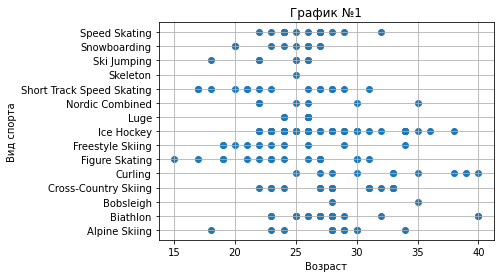

In [ ]:
plt.title("График №1")
plt.xlabel("Возраст")
plt.ylabel("Вид спорта")
plt.grid()
plot_1 = plt.scatter(df['Age'], df['Sport'])
plt.savefig('plot1.pdf', bbox_inches='tight')
plt.show()

In [ ]:
mean_num = df.groupby('Year').Age.mean().dropna()

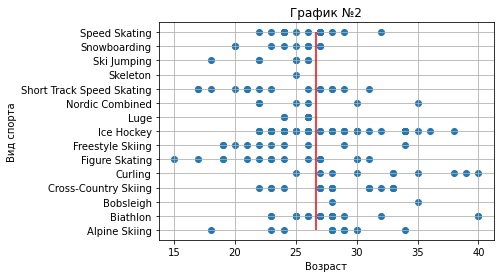

In [ ]:
plt.title("График №2")
plt.xlabel("Возраст")
plt.ylabel("Вид спорта")
plt.grid()
plt.scatter(df['Age'], df['Sport'])
plot_2 = plt.vlines(mean_num, df['Sport'].min(), df['Sport'].max(), colors = "r")
plt.savefig('plot2.pdf', bbox_inches='tight')
plt.show()

In [ ]:
df2 = df2[df2['Season'] == 'Summer']
df2 = df2.drop('City', axis = 1)
display(df2)

,Sort,Year,Sport,Gender,Event,Athlete,Age,Result,Medal,Country,Team,Season,Team Medals,OR,WR,Notes
0,1,1896,Athletics,M,100m,Tom Burke,21.0,12,GOLD,Greece,United States,Summer,1.0,=ORS/OR,NaN,NaN
1,2,1896,Athletics,M,100m,Fritz Hofmann,24.0,12.2,SILVER,Greece,Germany,Summer,1.0,NaN,NaN,NaN
2,3,1896,Athletics,M,100m,Francis Lane,21.0,12.6,BRONZE,Greece,United States,Summer,1.0,ORS,NaN,NaN
3,4,1896,Athletics,M,100m,Alajos Szokolyi,24.0,12.6,BRONZE,Greece,Hungary,Summer,1.0,NaN,NaN,NaN
4,5,1896,Athletics,M,400m,Tom Burke,21.0,54.2,GOLD,Greece,United States,Summer,1.0,OR,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39936,39936,2016,Wrestling,M,98,Ghasem Rezaei,30.0,NaN,BRONZE,Brazil,Iran,Summer,1.0,NaN,NaN,NaN
39937,39937,2016,Wrestling,M,130,Mijain Lopez,33.0,NaN,GOLD,Brazil,Cuba,Summer,1.0,NaN,NaN,NaN
39938,39938,2016,Wrestling,M,130,Riza Kayaalp,26.0,NaN,SILVER,Brazil,Turkey,Summer,1.0,NaN,NaN,NaN
39939,39939,2016,Wrestling,M,130,Sabah Shariati,27.0,NaN,BRONZE,Brazil,Azerbaijan,Summer,1.0,NaN,NaN,NaN


In [ ]:
df2['Year of Birth'] = df2['Year'] - df2['Age']
display(df2)

,Sort,Year,Sport,Gender,Event,Athlete,Age,Result,Medal,Country,Team,Season,Team Medals,OR,WR,Notes,Year of Birth
0,1,1896,Athletics,M,100m,Tom Burke,21.0,12,GOLD,Greece,United States,Summer,1.0,=ORS/OR,NaN,NaN,1875.0
1,2,1896,Athletics,M,100m,Fritz Hofmann,24.0,12.2,SILVER,Greece,Germany,Summer,1.0,NaN,NaN,NaN,1872.0
2,3,1896,Athletics,M,100m,Francis Lane,21.0,12.6,BRONZE,Greece,United States,Summer,1.0,ORS,NaN,NaN,1875.0
3,4,1896,Athletics,M,100m,Alajos Szokolyi,24.0,12.6,BRONZE,Greece,Hungary,Summer,1.0,NaN,NaN,NaN,1872.0
4,5,1896,Athletics,M,400m,Tom Burke,21.0,54.2,GOLD,Greece,United States,Summer,1.0,OR,NaN,NaN,1875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39936,39936,2016,Wrestling,M,98,Ghasem Rezaei,30.0,NaN,BRONZE,Brazil,Iran,Summer,1.0,NaN,NaN,NaN,1986.0
39937,39937,2016,Wrestling,M,130,Mijain Lopez,33.0,NaN,GOLD,Brazil,Cuba,Summer,1.0,NaN,NaN,NaN,1983.0
39938,39938,2016,Wrestling,M,130,Riza Kayaalp,26.0,NaN,SILVER,Brazil,Turkey,Summer,1.0,NaN,NaN,NaN,1990.0
39939,39939,2016,Wrestling,M,130,Sabah Shariati,27.0,NaN,BRONZE,Brazil,Azerbaijan,Summer,1.0,NaN,NaN,NaN,1989.0


In [ ]:
df2.to_csv("DF_TO_CSV.csv", index = False)